# COGS 108 - Final Project

# Overview

Having access to the outdoors is beneficial for both our physical and mental wellbeing. San Diego is the prime location to enjoy the outdoors year round and understanding factors that impact people's experiences in parks and facilities is essential. I was looking to find out what factors can be found to have a strong relationship with the Yelp ratings. I wanted to extrapolate from population and facility data to gather a greater understanding of what influences people's park and facility experiences. This project found no strong relationship between Yelp rating and many factors related to size of the population and/or number of parks or facilities. 

# Name & GitHub

- Name: Kiana Killian
- GitHub Username: KianaKillian

# Research Question

Do more densely populated zip codes have nicer parks and facilities? Are the quality of the parks and facilities more associated with the population size or density or number of parks?

# Background and Prior Work

   Access to everything, from food to education, tends to vary based on a neighborhood's wealth. Looking into the current situation in San Diego and studying what parks in which location offer users to partake in certain activities is important to ensure accessibility. In 2013 the County of San Diego noticed that the residents in Lakeside greatly struggled with getting access to workout equipment and space (National). Many of the youth in Lakeside struggled with being overweight or obese. As a result, the county began a previously piloted program, known as Rec Rx, which offered free reaction programs and discounted fitness classes to youth with a prescription from their pediatrician. This program saw little success as even those who were given prescriptions by their pediatrician did not use them to enroll in the fitness classes. This brought up many questions as to what future steps could be taken. Over 8% of residents ages 18-24 live in what is considered poverty status (Datawheel). This number has most likely grown since the COVID-19 pandemic began. San Diego County has 20.1% prevalence of adult obesity and, as of 2018, 93.2% of San Diego County residents were estimated to have access to exercise opportunities (Datawheel). Additionally, California has the highest estimated chronically homeless individuals. All of these statistics further emphasize the importance of ensuring affordable access to spaces in which residents can satisfy their physical movement needs.  Having access to not only a nearby but also well equipped park can be life changing for residents. The population density of an area often has some connection to its wealth and resources available to it. Going outside and enjoying the fresh air and local parts has many benefits. We must be cognizant of what variables lead people to rate their experience of facilities lower.
   
   Yelp, a website that came about in 2004, is known to offer great recommendations when looking to try something new. Whether that be a new restaurant or new park, it has loads of information for you to go through to find what you're looking for. Interestingly, 51% of Yelp reviews are given 5 stars (Fast). It'll be interesting to investigate some of the less thought of variables that may have a relationship with the ratings received by facilities around San Diego. Throughout the remainder of this project, the word 'facilities' will be used to refer to parks, recreation centers, teen centers, and all other facilities listed under San Diego Parks on Yelp.
   
   The Pearson Correlation Coefficient, commonly referred to as Pearson's R or simply r, helps to project the relationship between two variables. As the r value approaches +1, that suggests a strong positive correlation. As the r value approaches, that suggests a strong negative correlation. The closer the r value is to 0, the weaker the correlation is between the two variables. A r value of 0.4 or greater is considered a positive correlation while a r value of -0.4 or more negative is considered a negative correlation. Once again, a value of 0 indicates no correlation. In this project the relationship between various variables and the average ratings of facilities in zip codes will be calculated. The absolute value of R gives an idea of how strong of a relationship the two variables have (Statistics). 

References:

- 1)National Recreation and Park Association 2014 County of San Diego Breaks Barrier to Recreation for Obese Youth. Available at https://www.nrpa.org/success-stories/county-of-san-diego-breaks-barriers-to-recreation-for-obese-youth/ [Last accessed 23October2020]\n,"
- 2)Datawheel 2018 DATAUSA: San Diego County, CA. Available at https://datausa.io/profile/geo/san-diego-ca#economy  [Last accessed 23October2020]\n,"
- 3)Redfin 2020 Marking Insights. Available at https://www.redfin.com/zipcode/92122/housing-market [Last accessed 23October2020]\n,"
- 4)San Diego County 2013 County of San Diego HHSA Service Regions. Available at https://www.sandiegocounty.gov/content/dam/sdc/hhsa/programs/bhs/TRL/2014-15%20Updates/HHSA%20Service%20Regions%20map%2011%20x%2017%20landscape.pdf [Last accessed 23October2020]\n,"
- 5)City of San Diego 2020 City Parks. Available at https://experience.arcgis.com/experience/01e5d528b6114385a7962762f514533f/page/page_6/  [Last accessed on 23October2020]\n,"
- 6)Cubits 2019 California Zip Codes by Population. Available at https://www.california-demographics.com/zip_codes_by_population [Last accessed on 23October2020]
- 7)"Fast Facts." Yelp Newsroom, Yelp, 30 Sept. 2020, www.yelp-press.com/company/fast-facts/default.aspx.
- 8) Statistics How To. "Correlation Coefficient: Simple Definition, Formula, Easy Steps." Statistics How To, 2020, www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/.

# Hypothesis

With San Diego being a very diverse city, especially in regards to economic diversity, I am predicting that the more densely populated areas will have higher reviews. I think that densely populated areas's facilities are used more often and, thus, are better maintained. I think that the lower the number of people per facility will actually lower the rating because that suggests that the zipcode is not densely populated which both means it's possibly less easily accessible and less maintained. 

# Dataset(s)

1) Dataset Name: Yelp

    Link to the dataset: https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_parks.csv (dataset was provided)
    
    Number of observations: 833 observations
    
This dataset includes individual the name of parks and facilities around San Diego, the facility's address, their phone number, id, url, average rating, number of Yelp reviews, location based on longitude and latitude, and whether or not it is closed. From this dataset I will be using the zipcode from the address, the name of the facility, and the average Yelp rating. A total number of facilities per zip code will be counted and the Yelp rating will be averaged from all the facilities within the zip code to represent the zipcode's average facility ranking. 

2) Dataset Name: Census

    Link to the dataset: http://zipatlas.com/us/ca/san-diego/zip-code-comparison/population-density.htm
    
    Number of observations: 31 observations

This dataset is originally a little bit messier. It includes the zip code, location, city, city's population, people per square mile, and the national ranking of the people per square mile calculations. I will be using the zip code, population, people per square mile. From this information regarding the population in this dataset and the total number of facilities calculated in the Yelp dataset, the number of people per facility will be calculated as well.     

# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats

 
import seaborn as sns
sns.set()
sns.set_context('talk')

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# scikit-learn imports
#   SVM (Support Vector Machine) classifer 
#   Vectorizer, which transforms text data into bag-of-words feature
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
#   Metrics functions to evaluate performance
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
tfidf = TfidfVectorizer(sublinear_tf = True, analyzer = 'word', max_features = 2000, tokenizer = word_tokenize)

[nltk_data] Downloading package punkt to /home/knkillia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/knkillia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df_yelp = pd.read_csv('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_parks.csv')

# preparing and scraping the table off of this website 
url = 'http://zipatlas.com/us/ca/san-diego/zip-code-comparison/population-density.htm'
df_gen_pop_density = pd.read_html(url,match = "National Rank")
tables = pd.read_html(url)
df_pop_density = tables[11]

Now I scraped one table from a website that included the population in San Diego divided up amongst the zipcodes. There is a raw population count and a "Person/Sq. Mile" calculated number to suggest the density of the zipcode.  

# Data Cleaning

Firstly, I will extract the zipcode from the Yelp data's address column so that it may later be used to merge on with other dataframes. 

In [4]:
# extracting the zipcode from the address column
df_yelp['zip'] = df_yelp['address'].str.extract(r'(\d{5}\-?\d{0,4})')
# removing columns that are not needed
df_yelp = df_yelp.drop(columns = ['address','id', 'url','is_closed','review_count','longitude','latitude', 'phone'])
#renaming name column so that there is continuity between datasets if needed
df_yelp.rename(columns = {'name':'id'}, inplace = True) 

In [5]:
# helping to outline the table from the website
df_pop_density = df_pop_density.loc[:, ~(df_pop_density == 'San Diego, California').any()]
df_pop_density = df_pop_density.loc[:, ~(df_pop_density == 'Location').any()]
df_pop_density = df_pop_density.loc[:, ~(df_pop_density == 'National Rank').any()]
df_pop_density = df_pop_density.loc[:, ~(df_pop_density == '#').any()]

In [6]:
df_pop_density = df_pop_density.drop(df_pop_density.index[[0,1]])
# naming the columns on the new dataset
df_pop_density.columns = ['zip','Population','People/Sq. Mile']

The scraped dataset is now cleaned up and ready to be merged with the Yelp dataset. The scraped dataset contains three columns; the zip code, the population, and the people per square mile ratio. 

In [7]:
df_pop_density

,zip,Population,People/Sq. Mile
2,92104,47688,12515.21
3,92113,47417,10347.01
4,92102,47123,10203.52
5,92139,36341,10127.19
6,92116,33080,9364.67
7,92115,56883,9205.56
8,92107,27956,9164.16
9,92103,30186,8045.60
10,92114,66837,7944.81
11,92119,21850,6373.54


In [8]:
# combining the two datasets around the 'zip' column
df_combine = pd.merge(df_yelp, df_pop_density,on = ['zip'])

In [9]:
df_combine['Number of Facilities'] = df_combine['zip'].map(df_combine['zip'].value_counts())

There are 525 parks within San Diego county that are included in this project. An additional column, titled "Number of Facilities'' is added to this dataframe to indicate how many parks are in that specific zip code.  

In [10]:
df_combine

,id,rating,zip,Population,People/Sq. Mile,Number of Facilities
0,Balboa Park,5.0,92101,27494,4635.70,127
1,Waterfront Park,4.5,92101,27494,4635.70,127
2,Pioneer Park,4.0,92101,27494,4635.70,127
3,Harbor Island Park,4.5,92101,27494,4635.70,127
4,Golden Hill Park,4.0,92101,27494,4635.70,127
...,...,...,...,...,...,...
520,Palm Avenue Trolley Station,3.0,92154,68764,1849.60,17
521,U.S. Customs & Border Protection,3.5,92154,68764,1849.60,17
522,Van Dam Peak,2.5,92128,42728,3947.64,2
523,Day of LOVE,4.5,92128,42728,3947.64,2


In [11]:
df_combine = df_combine.set_index('zip')

In [12]:
df_combine = df_combine.groupby(df_combine.index).mean()

In [13]:
#completing the final merge to 
df_final = pd.merge(df_combine, df_pop_density,on = ['zip'])
df_final.dtypes
df_final['Population'] = df_final['Population'].astype(int)
df_final['Number of Facilities'] = df_final['Number of Facilities'].astype(int)

df_final['People Per Facility'] = df_final['Population'] / df_final['Number of Facilities']

The final table has averaged the rating of all the facilities within the zip code so that each zip code has only one row. Once again a column is dedicated to indicating how many facilities fall within the zip code as well as the population and population density. There are 29 zipcodes. 

In [14]:
df_final

,zip,rating,Number of Facilities,Population,People/Sq. Mile,People Per Facility
0,92101,4.007874,127,27494,4635.70,216.488189
1,92102,4.350000,10,47123,10203.52,4712.300000
2,92103,3.925000,20,30186,8045.60,1509.300000
3,92104,4.243902,41,47688,12515.21,1163.121951
4,92106,4.441176,17,18505,3121.56,1088.529412
5,92107,4.294118,17,27956,9164.16,1644.470588
6,92108,3.729167,24,11640,3025.41,485.000000
7,92109,4.257143,35,46071,4479.20,1316.314286
8,92110,3.925926,27,24149,5013.77,894.407407
9,92111,3.973684,19,46821,5460.36,2464.263158


# Data Analysis and Results

**Data Visualizaion**

Firstly, I have outlined each set of data to gather a better understanding of their individual relationships.

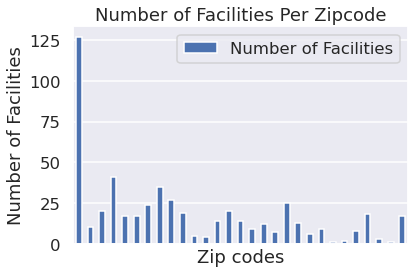

In [15]:
# plotting the number of facilities per zipcode
ax = df_final.plot.bar(x='zip', y='Number of Facilities', rot=0, stacked = True)
ax.set_title('Number of Facilities Per Zipcode')
ax.set_ylabel('Number of Facilities')
ax.set_xlabel('Zip codes')
ax1 = plt.axes()
ax.axes.xaxis.set_ticks([])

plt.grid(True)
plt.show()


Figure 1: This figure shows that there isn't an equal distribution of facilities across zip codes in San Diego and one zip code has significantly more facilities than the rest. This is probably because of the population density in the areas and will be looked further into later on. 

**Linear Regression Models**

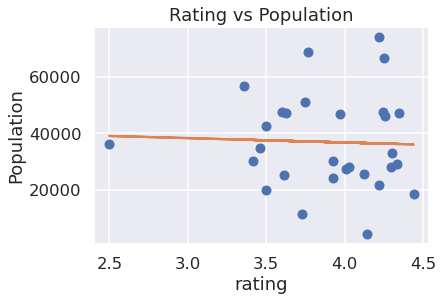

In [16]:
# ensuring data type is appropriate
df_final['Population'] = df_final['Population'].astype(int)

# plotting scatter plot
ax1 = df_final.plot.scatter(x='rating',
                      y='Population',
                      c='DarkBlue')
x = df_final.rating
y = df_final.Population
plt.plot(x, y, 'o')
plt.title('Rating vs Population')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

# calculating the Pearson's Correlation Coefficient
pc2 = np.corrcoef(df_final['rating'], df_final['Population'])[0, 1]

Figure 2 shows that there does not appear to be a relationship or at best a weak correlation between rating of facilities and the raw population in those zip codes. There seems to be one facility that is an outlier and received an average rating of 2.5 but most the others received an average of over 3.25. Despite this, however, there does not appear to be a correlation between the two variables. 

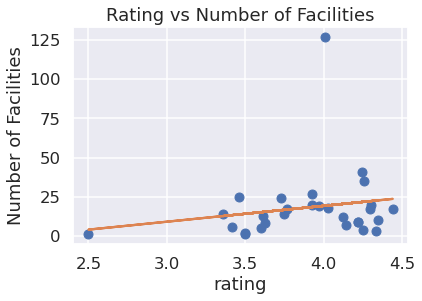

In [17]:
# ensuring data type is appropriate
df_final['Number of Facilities'] = df_final['Number of Facilities'].astype(int)

# plotting scatter plot
ax1 = df_final.plot.scatter(x='rating',
                      y='Number of Facilities',
                      c='DarkBlue')
x = df_final['rating']
y = df_final['Number of Facilities']
plt.plot(x,y,'o')
plt.title('Rating vs Number of Facilities')
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)
m,b = np.polyfit(x,y,1)

# calculating the Pearson's Correlation Coefficient
pc3 = np.corrcoef(df_final['rating'], df_final['Number of Facilities'])[0, 1]

Figure 3 shows that there may be a significant correlation between the rating and number of facilities in an area. This is interesting and made me consider if it may be attributed to large groups of facilities that are in more densely populated areas. With that being said, there is one zip code that is an outlier and has over 125 facilities.

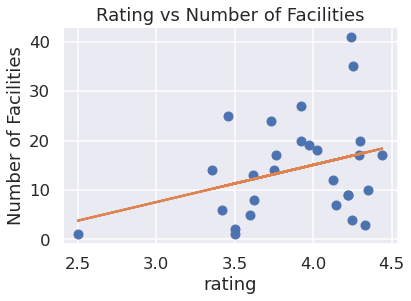

In [18]:
# ensuring data type is appropriate
df_final['Number of Facilities'] = df_final['Number of Facilities'].astype(int)
# removing outlier
df_final = df_final[df_final['Number of Facilities'] < 125]

# plotting scatter plot
ax1 = df_final.plot.scatter(x='rating',
                      y='Number of Facilities',
                      c='DarkBlue')
x = df_final['rating']
y = df_final['Number of Facilities']
plt.plot(x,y,'o')
plt.title('Rating vs Number of Facilities')
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)
m,b = np.polyfit(x,y,1)

# calculating the Pearson's Correlation Coefficient
pc4 = np.corrcoef(df_final['rating'], df_final['Number of Facilities'])[0, 1]

After removing the outlier for Figure 4, there still appears to be a correlation, albiet very weak, between the rating and number of facilities within a zipcode.

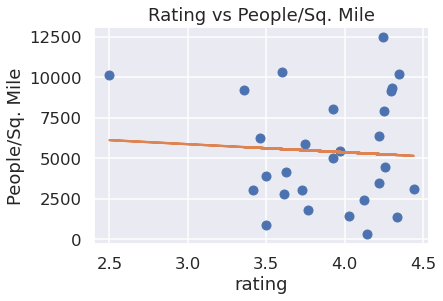

In [19]:
# ensuring data type is appropriate
df_final['People/Sq. Mile'] = pd.to_numeric(df_final['People/Sq. Mile'], errors="coerce")

# plotting scatter plot
ax1 = df_final.plot.scatter(x='rating',
                      y='People/Sq. Mile',
                      c='DarkBlue')
x = df_final['rating']
y = df_final['People/Sq. Mile']
plt.plot(x,y,'o')
plt.title('Rating vs People/Sq. Mile')


m,b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)
m,b = np.polyfit(x,y,1)

# calculating the Pearson's Correlation Coefficient
pc5 = np.corrcoef(df_final['rating'], df_final['People/Sq. Mile'])[0, 1]

Figure 5 shows that there is what appears at first glance to be a weak correlation between population density and rating. 

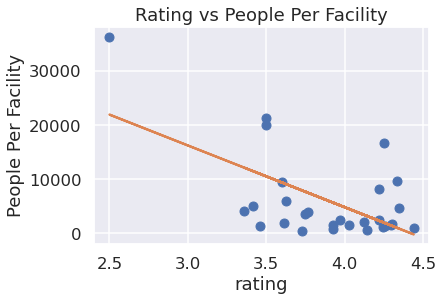

In [20]:
# ensuring data type is appropriate
df_final['People Per Facility'] = pd.to_numeric(df_final['People Per Facility'], errors="coerce")

# plotting scatter plot
ax1 = df_final.plot.scatter(x='rating',
                      y='People Per Facility',
                      c='DarkBlue')
x = df_final['rating']
y = df_final['People Per Facility']
plt.plot(x,y,'o')
plt.title('Rating vs People Per Facility')


m,b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)
m,b = np.polyfit(x,y,1)

# calculating the Pearson's Correlation Coefficient
pc6 = np.corrcoef(df_final['rating'], df_final['People Per Facility'])[0, 1]

Figure 6 suggests that there may also be a relationship between rating and the number of people per facility. 

In [21]:
# creating table with the Pearson Correlation Coefficients in it
d = {'Graph Title': ['Rating vs Population', 'Rating vs Number of Facilities','Rating vs People/Sq, Mile','Rating vs People Per Facility'], 'Pearson Correlation Coefficient': [pc2, pc4, pc5, pc6]}
df_pc = pd.DataFrame(data=d)

In [22]:
df_pc

,Graph Title,Pearson Correlation Coefficient
0,Rating vs Population,-0.038790
1,Rating vs Number of Facilities,0.323965
2,"Rating vs People/Sq, Mile",-0.063679
3,Rating vs People Per Facility,-0.598301


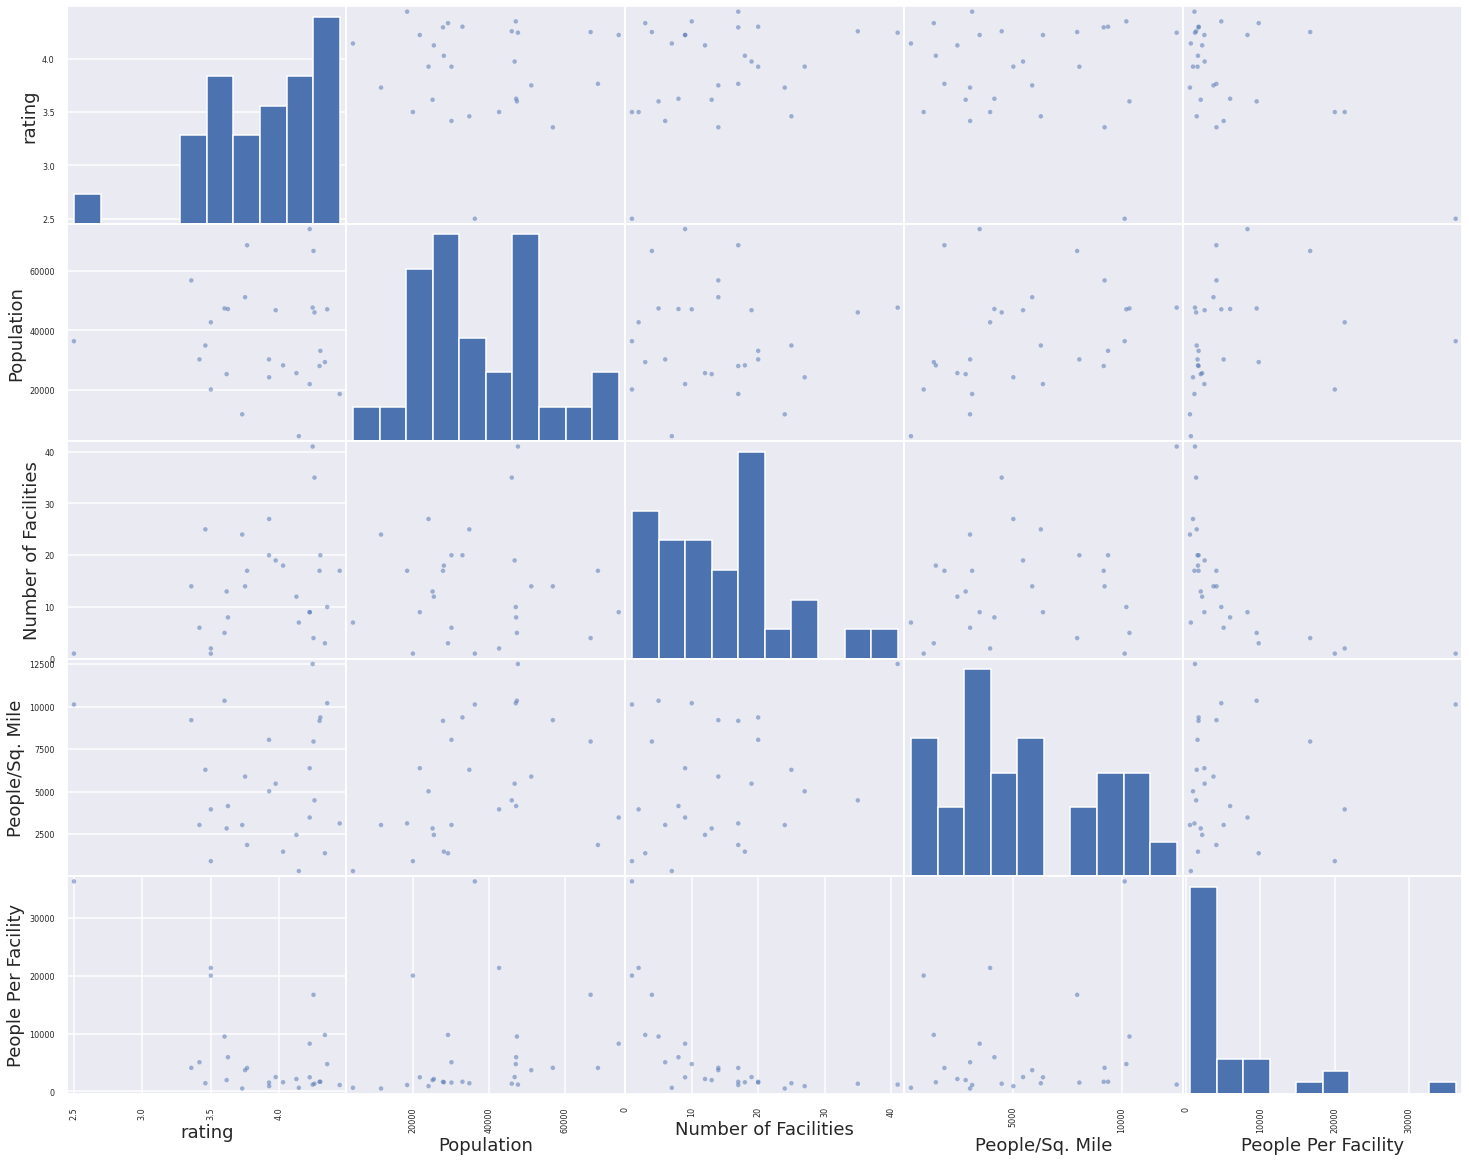

In [23]:
pd.plotting.scatter_matrix(df_final[['rating','Population','Number of Facilities','People/Sq. Mile', 'People Per Facility']], 
                           figsize=(25, 20));

Figure 7 is a scatterplot matrix that is showing all the data in df_final. 

# Ethics and Privacy

Some of the data was provided to me for this project, which meant I was granted the approval to use it for this project. The data that I did not get from the provided datasets was on Zip Atlas, which offers public access to census information. Because this information went down as the level of zip codes, there definitely was more sensitive information on it. I cleaned the data so that it was much more generalized to ensure people's privacy. 

This data could be biased, especially because of the sources I collected it from. 61% of Yelp review authors are found to have a college education and additional 20% have a grad school education. This does not directly reflect the general population so the sample that expressed their opinion on Yelp may lead to biased data and analysis. 

# Conclusion and Discussion

This project found that there was little to no correlation between any of the variables studied and the Yelp ratings, except between the Yelp rating and the number of People Per Facility. The Pearson Correlation Coefficient needs to have an absolute value of 0.4 or greater in order to be considered much of any type of correlation. The only relationship that met that criteria was the rating vs People per Facility relationship, meaning these variables have the strongest relationship. It had a value of -0.598301, suggesting there seemed to be more of a negative correlation between the Yelp reviews and the number of People per Facility. This suggests that as the number of people per facility increases, the Yelp rating will decrease. Coming in second is the Number of Facilities's relationship with the Yelp ratings. This relationship has a value of -0.323965. This negative relationship, albeit very weak, suggests that as the number of people per facility decreases, the average facility ratings for the zipcode increase. This is quite interesting because it differs from my hypothesis. The remaining two variables, raw population and people/sq. mile, and their relationship with the Yelp ratings have no correlation. The Population and Yelp rating's relationship produced a value of -0.038790. This slightly negative value is so close to 0 that it indicates that no correlation was detected. Similarly, the People/Sq. Mile and Yelp rating's relationship calculated are values -0.063679. This also slightly negative number is so close to 0 and suggests no correlation between the two variables. There could be countless reasons why the number of People Per Facility in a zip code has the strongest correlation with the Yelp rating. Perhaps those who live in these less densely populated zip codes have easier access to facilities and have it more to themselves.

One issue I ran into while completing this analysis is that some zip codes had only had a few facilities while others had a lot. Because of the way I averaged all of the facilities ratings to represent the zip code, this could easily have screwed my results.This decision to do this enabled a less desirable facility to be overlooked if a highly rated facility was within the same zip code. Also, this project was inspired by looking at the accessibility of outside places for people for the betterment of their well being. Although finding what tends to influence people's positive or negative ratings of facilities is important because it is true that if people don't enjoy a facility then they're less likely to return, I did not investigate the actual issue of accessibility besides looking at the number of People/Sq. Mile and People Per Facility. This was primarily because there was a limited overlap in available information across databases. Zip Code seemed to be the one variable that was available in a few databases. 

Another limitation in this project was that the size of the facilities and the amenities they offered was not included. Especially when regarding people's ratings of a  facility, it would be more valuable to see what the facilities have to offer. In a future project, it would be interesting to look at the type of amenities the facilities offered, their size, and the proximity to other facilities. 